In [1]:
#Author: Tahís Ahtty
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
nltk.download('stopwords')
import string
import re
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [3]:
#import spacy
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [4]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline

In [5]:
import tempfile
##Cambiar al path correspondiente en su directorio
articles_extendido=pd.read_csv("C:/Users/User/Thalia/Espol/2018-2S/Mineria/noticiasVenezuela/noticias_Venezuela_extendido.csv")
articles_extendido

,fecha_string,fecha,url,titulo,texto,categoria,fecha_string.1,mes
0,2018-02-04,2018-02-04T15:47:00,https://www.eluniverso.com/noticias/2018/12/04...,ONU quiere conseguir $ 738 millones para ayuda...,Ginebra -Naciones Unidas dijo el martes que bu...,Economia,2018-02-04,2
1,2018-02-12,2018-02-12T14:19:00,https://www.eluniverso.com/noticias/2018/12/12...,Peinados por publicidad y otros cambios que ha...,"Peinados a cambio de publicidad, un nuevo códi...",Economia,2018-02-12,2
2,2018-02-12,2018-02-12T18:10:00,https://www.eluniverso.com/noticias/2018/12/12...,"En OEA, Colombia pide tomar conciencia sobre m...",Washington -Colombia pidió el miércoles a los ...,Politica,2018-02-12,2
3,2018-02-12,2018-02-12T00:00:00,https://www.eluniverso.com/noticias/2018/12/12...,Nicolás Maduro a embajadores: Si se quieren ir...,"El presidente de Venezuela, Nicolás Maduro, re...",Represion,2018-02-12,2
4,2018-02-14,2018-02-14T00:00:00,https://www.eluniverso.com/noticias/2018/12/13...,Venezuela: Personas con VIH recurren a bebida ...,"Caracas -Con cuidado, el hombre escoge las hoj...",Salud,2018-02-14,2
5,2018-04-09,2018-04-09T19:02:00,https://www.eluniverso.com/noticias/2018/04/09...,Gobierno de Chile otorgará visa especial a ven...,El gobierno de Sebastián Piñera anunció este l...,Sociedad,2018-04-09,4
6,2018-04-09,2018-04-09T17:26:00,https://www.eluniverso.com/noticias/2018/04/09...,Destituida Corte Suprema de Venezuela pide des...,"El Tribunal Supremo de Justicia de Venezuela, ...",Politica,2018-04-09,4
7,2018-04-09,2018-04-09T08:21:00,https://www.eluniverso.com/entretenimiento/201...,Ricardo Montaner encabeza campaña de solidarid...,El cantante Ricardo Montaner y la organización...,Sociedad,2018-04-09,4
8,2018-04-10,2018-04-10T00:00:00,https://www.eluniverso.com/noticias/2018/04/10...,El tema Venezuela sigue presente en la región,El tema Venezuela sigue siendo frecuente entre...,Politica,2018-04-10,4
9,2018-04-10,2018-04-10T07:17:00,https://www.eluniverso.com/noticias/2018/04/10...,España detiene a dos venezolanos por pedido de...,La Fiscalía General anunció que España apresó ...,Represion,2018-04-10,4


In [6]:
noticias = articles_extendido

### Lipieza del texto (Corregido)

In [7]:
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

from gensim import corpora
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "c:\users\user\appdata\local\temp" will be used to save temporary dictionary and corpus.


In [8]:
noticias.texto=noticias['texto'].apply(lambda x:str(x))
noticias.texto.head(10)

0    Ginebra -Naciones Unidas dijo el martes que bu...
1    Peinados a cambio de publicidad, un nuevo códi...
2    Washington -Colombia pidió el miércoles a los ...
3    El presidente de Venezuela, Nicolás Maduro, re...
4    Caracas -Con cuidado, el hombre escoge las hoj...
5    El gobierno de Sebastián Piñera anunció este l...
6    El Tribunal Supremo de Justicia de Venezuela, ...
7    El cantante Ricardo Montaner y la organización...
8    El tema Venezuela sigue siendo frecuente entre...
9    La Fiscalía General anunció que España apresó ...
Name: texto, dtype: object

In [9]:
sid = SentimentIntensityAnalyzer() 
noticias["sentimiento"] = noticias["texto"].apply(lambda x: sid.polarity_scores(x)["compound"])
noticias.head(10)

,fecha_string,fecha,url,titulo,texto,categoria,fecha_string.1,mes,sentimiento
0,2018-02-04,2018-02-04T15:47:00,https://www.eluniverso.com/noticias/2018/12/04...,ONU quiere conseguir $ 738 millones para ayuda...,Ginebra -Naciones Unidas dijo el martes que bu...,Economia,2018-02-04,2,-0.9766
1,2018-02-12,2018-02-12T14:19:00,https://www.eluniverso.com/noticias/2018/12/12...,Peinados por publicidad y otros cambios que ha...,"Peinados a cambio de publicidad, un nuevo códi...",Economia,2018-02-12,2,-0.8591
2,2018-02-12,2018-02-12T18:10:00,https://www.eluniverso.com/noticias/2018/12/12...,"En OEA, Colombia pide tomar conciencia sobre m...",Washington -Colombia pidió el miércoles a los ...,Politica,2018-02-12,2,-0.9231
3,2018-02-12,2018-02-12T00:00:00,https://www.eluniverso.com/noticias/2018/12/12...,Nicolás Maduro a embajadores: Si se quieren ir...,"El presidente de Venezuela, Nicolás Maduro, re...",Represion,2018-02-12,2,0.0000
4,2018-02-14,2018-02-14T00:00:00,https://www.eluniverso.com/noticias/2018/12/13...,Venezuela: Personas con VIH recurren a bebida ...,"Caracas -Con cuidado, el hombre escoge las hoj...",Salud,2018-02-14,2,0.0000
5,2018-04-09,2018-04-09T19:02:00,https://www.eluniverso.com/noticias/2018/04/09...,Gobierno de Chile otorgará visa especial a ven...,El gobierno de Sebastián Piñera anunció este l...,Sociedad,2018-04-09,4,-0.8957
6,2018-04-09,2018-04-09T17:26:00,https://www.eluniverso.com/noticias/2018/04/09...,Destituida Corte Suprema de Venezuela pide des...,"El Tribunal Supremo de Justicia de Venezuela, ...",Politica,2018-04-09,4,0.5574
7,2018-04-09,2018-04-09T08:21:00,https://www.eluniverso.com/entretenimiento/201...,Ricardo Montaner encabeza campaña de solidarid...,El cantante Ricardo Montaner y la organización...,Sociedad,2018-04-09,4,-0.9118
8,2018-04-10,2018-04-10T00:00:00,https://www.eluniverso.com/noticias/2018/04/10...,El tema Venezuela sigue presente en la región,El tema Venezuela sigue siendo frecuente entre...,Politica,2018-04-10,4,-0.9186
9,2018-04-10,2018-04-10T07:17:00,https://www.eluniverso.com/noticias/2018/04/10...,España detiene a dos venezolanos por pedido de...,La Fiscalía General anunció que España apresó ...,Represion,2018-04-10,4,-0.2960


In [21]:
from unicodedata import normalize
def remove_accent(text):
    texto=text.replace('á','a')
    texto1=texto.replace('é','e')
    texto2=texto1.replace('í','i')
    texto3=texto2.replace('ó','o')
    texto4=texto3.replace('ú','u')
    return texto4
    
noticias['noticias_nonaccent'] = noticias['texto'].apply(lambda x: remove_accent(x))
noticias.noticias_nonaccent.head(10)

0    Ginebra -Naciones Unidas dijo el martes que bu...
1    Peinados a cambio de publicidad, un nuevo codi...
2    Washington -Colombia pidio el miercoles a los ...
3    El presidente de Venezuela, Nicolas Maduro, re...
4    Caracas -Con cuidado, el hombre escoge las hoj...
5    El gobierno de Sebastian Piñera anuncio este l...
6    El Tribunal Supremo de Justicia de Venezuela, ...
7    El cantante Ricardo Montaner y la organizacion...
8    El tema Venezuela sigue siendo frecuente entre...
9    La Fiscalia General anuncio que España apreso ...
Name: noticias_nonaccent, dtype: object

In [22]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

noticias['noticias_punct'] = noticias['noticias_nonaccent'].apply(lambda x: remove_punct(x))
noticias.head(10)

,fecha_string,fecha,url,titulo,texto,categoria,fecha_string.1,mes,sentimiento,noticias_nonaccent,noticias_punct
0,2018-02-04,2018-02-04T15:47:00,https://www.eluniverso.com/noticias/2018/12/04...,ONU quiere conseguir $ 738 millones para ayuda...,Ginebra -Naciones Unidas dijo el martes que bu...,Economia,2018-02-04,2,-0.9766,Ginebra -Naciones Unidas dijo el martes que bu...,Ginebra Naciones Unidas dijo el martes que bus...
1,2018-02-12,2018-02-12T14:19:00,https://www.eluniverso.com/noticias/2018/12/12...,Peinados por publicidad y otros cambios que ha...,"Peinados a cambio de publicidad, un nuevo códi...",Economia,2018-02-12,2,-0.8591,"Peinados a cambio de publicidad, un nuevo codi...",Peinados a cambio de publicidad un nuevo codig...
2,2018-02-12,2018-02-12T18:10:00,https://www.eluniverso.com/noticias/2018/12/12...,"En OEA, Colombia pide tomar conciencia sobre m...",Washington -Colombia pidió el miércoles a los ...,Politica,2018-02-12,2,-0.9231,Washington -Colombia pidio el miercoles a los ...,Washington Colombia pidio el miercoles a los e...
3,2018-02-12,2018-02-12T00:00:00,https://www.eluniverso.com/noticias/2018/12/12...,Nicolás Maduro a embajadores: Si se quieren ir...,"El presidente de Venezuela, Nicolás Maduro, re...",Represion,2018-02-12,2,0.0000,"El presidente de Venezuela, Nicolas Maduro, re...",El presidente de Venezuela Nicolas Maduro rest...
4,2018-02-14,2018-02-14T00:00:00,https://www.eluniverso.com/noticias/2018/12/13...,Venezuela: Personas con VIH recurren a bebida ...,"Caracas -Con cuidado, el hombre escoge las hoj...",Salud,2018-02-14,2,0.0000,"Caracas -Con cuidado, el hombre escoge las hoj...",Caracas Con cuidado el hombre escoge las hojas...
5,2018-04-09,2018-04-09T19:02:00,https://www.eluniverso.com/noticias/2018/04/09...,Gobierno de Chile otorgará visa especial a ven...,El gobierno de Sebastián Piñera anunció este l...,Sociedad,2018-04-09,4,-0.8957,El gobierno de Sebastian Piñera anuncio este l...,El gobierno de Sebastian Piñera anuncio este l...
6,2018-04-09,2018-04-09T17:26:00,https://www.eluniverso.com/noticias/2018/04/09...,Destituida Corte Suprema de Venezuela pide des...,"El Tribunal Supremo de Justicia de Venezuela, ...",Politica,2018-04-09,4,0.5574,"El Tribunal Supremo de Justicia de Venezuela, ...",El Tribunal Supremo de Justicia de Venezuela c...
7,2018-04-09,2018-04-09T08:21:00,https://www.eluniverso.com/entretenimiento/201...,Ricardo Montaner encabeza campaña de solidarid...,El cantante Ricardo Montaner y la organización...,Sociedad,2018-04-09,4,-0.9118,El cantante Ricardo Montaner y la organizacion...,El cantante Ricardo Montaner y la organizacion...
8,2018-04-10,2018-04-10T00:00:00,https://www.eluniverso.com/noticias/2018/04/10...,El tema Venezuela sigue presente en la región,El tema Venezuela sigue siendo frecuente entre...,Politica,2018-04-10,4,-0.9186,El tema Venezuela sigue siendo frecuente entre...,El tema Venezuela sigue siendo frecuente entre...
9,2018-04-10,2018-04-10T07:17:00,https://www.eluniverso.com/noticias/2018/04/10...,España detiene a dos venezolanos por pedido de...,La Fiscalía General anunció que España apresó ...,Represion,2018-04-10,4,-0.2960,La Fiscalia General anuncio que España apreso ...,La Fiscalia General anuncio que España apreso ...


In [23]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

noticias['noticias_tokenized'] =  noticias['noticias_punct'].apply(lambda x: tokenization(x.lower()))
noticias.head(10)

,fecha_string,fecha,url,titulo,texto,categoria,fecha_string.1,mes,sentimiento,noticias_nonaccent,noticias_punct,noticias_tokenized
0,2018-02-04,2018-02-04T15:47:00,https://www.eluniverso.com/noticias/2018/12/04...,ONU quiere conseguir $ 738 millones para ayuda...,Ginebra -Naciones Unidas dijo el martes que bu...,Economia,2018-02-04,2,-0.9766,Ginebra -Naciones Unidas dijo el martes que bu...,Ginebra Naciones Unidas dijo el martes que bus...,"[ginebra, naciones, unidas, dijo, el, martes, ..."
1,2018-02-12,2018-02-12T14:19:00,https://www.eluniverso.com/noticias/2018/12/12...,Peinados por publicidad y otros cambios que ha...,"Peinados a cambio de publicidad, un nuevo códi...",Economia,2018-02-12,2,-0.8591,"Peinados a cambio de publicidad, un nuevo codi...",Peinados a cambio de publicidad un nuevo codig...,"[peinados, a, cambio, de, publicidad, un, nuev..."
2,2018-02-12,2018-02-12T18:10:00,https://www.eluniverso.com/noticias/2018/12/12...,"En OEA, Colombia pide tomar conciencia sobre m...",Washington -Colombia pidió el miércoles a los ...,Politica,2018-02-12,2,-0.9231,Washington -Colombia pidio el miercoles a los ...,Washington Colombia pidio el miercoles a los e...,"[washington, colombia, pidio, el, miercoles, a..."
3,2018-02-12,2018-02-12T00:00:00,https://www.eluniverso.com/noticias/2018/12/12...,Nicolás Maduro a embajadores: Si se quieren ir...,"El presidente de Venezuela, Nicolás Maduro, re...",Represion,2018-02-12,2,0.0000,"El presidente de Venezuela, Nicolas Maduro, re...",El presidente de Venezuela Nicolas Maduro rest...,"[el, presidente, de, venezuela, nicolas, madur..."
4,2018-02-14,2018-02-14T00:00:00,https://www.eluniverso.com/noticias/2018/12/13...,Venezuela: Personas con VIH recurren a bebida ...,"Caracas -Con cuidado, el hombre escoge las hoj...",Salud,2018-02-14,2,0.0000,"Caracas -Con cuidado, el hombre escoge las hoj...",Caracas Con cuidado el hombre escoge las hojas...,"[caracas, con, cuidado, el, hombre, escoge, la..."
5,2018-04-09,2018-04-09T19:02:00,https://www.eluniverso.com/noticias/2018/04/09...,Gobierno de Chile otorgará visa especial a ven...,El gobierno de Sebastián Piñera anunció este l...,Sociedad,2018-04-09,4,-0.8957,El gobierno de Sebastian Piñera anuncio este l...,El gobierno de Sebastian Piñera anuncio este l...,"[el, gobierno, de, sebastian, pi, era, anuncio..."
6,2018-04-09,2018-04-09T17:26:00,https://www.eluniverso.com/noticias/2018/04/09...,Destituida Corte Suprema de Venezuela pide des...,"El Tribunal Supremo de Justicia de Venezuela, ...",Politica,2018-04-09,4,0.5574,"El Tribunal Supremo de Justicia de Venezuela, ...",El Tribunal Supremo de Justicia de Venezuela c...,"[el, tribunal, supremo, de, justicia, de, vene..."
7,2018-04-09,2018-04-09T08:21:00,https://www.eluniverso.com/entretenimiento/201...,Ricardo Montaner encabeza campaña de solidarid...,El cantante Ricardo Montaner y la organización...,Sociedad,2018-04-09,4,-0.9118,El cantante Ricardo Montaner y la organizacion...,El cantante Ricardo Montaner y la organizacion...,"[el, cantante, ricardo, montaner, y, la, organ..."
8,2018-04-10,2018-04-10T00:00:00,https://www.eluniverso.com/noticias/2018/04/10...,El tema Venezuela sigue presente en la región,El tema Venezuela sigue siendo frecuente entre...,Politica,2018-04-10,4,-0.9186,El tema Venezuela sigue siendo frecuente entre...,El tema Venezuela sigue siendo frecuente entre...,"[el, tema, venezuela, sigue, siendo, frecuente..."
9,2018-04-10,2018-04-10T07:17:00,https://www.eluniverso.com/noticias/2018/04/10...,España detiene a dos venezolanos por pedido de...,La Fiscalía General anunció que España apresó ...,Represion,2018-04-10,4,-0.2960,La Fiscalia General anuncio que España apreso ...,La Fiscalia General anuncio que España apreso ...,"[la, fiscalia, general, anuncio, que, espa, a,..."


In [24]:
lista_stopwords=['Venezuela','Maduro','venezolano','venezolanos','venezonlanas','venezolana','maduro','dijo','anuncio','venezuela','cada','ecuador','gobierno','nicolas']
stopword = nltk.corpus.stopwords.words('spanish')
stopword.extend(lista_stopwords)
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
noticias['noticia_nonstop'] = noticias['noticias_tokenized'].apply(lambda x: remove_stopwords(x))
noticias.head(10)

,fecha_string,fecha,url,titulo,texto,categoria,fecha_string.1,mes,sentimiento,noticias_nonaccent,noticias_punct,noticias_tokenized,noticia_nonstop
0,2018-02-04,2018-02-04T15:47:00,https://www.eluniverso.com/noticias/2018/12/04...,ONU quiere conseguir $ 738 millones para ayuda...,Ginebra -Naciones Unidas dijo el martes que bu...,Economia,2018-02-04,2,-0.9766,Ginebra -Naciones Unidas dijo el martes que bu...,Ginebra Naciones Unidas dijo el martes que bus...,"[ginebra, naciones, unidas, dijo, el, martes, ...","[ginebra, naciones, unidas, martes, busca, obt..."
1,2018-02-12,2018-02-12T14:19:00,https://www.eluniverso.com/noticias/2018/12/12...,Peinados por publicidad y otros cambios que ha...,"Peinados a cambio de publicidad, un nuevo códi...",Economia,2018-02-12,2,-0.8591,"Peinados a cambio de publicidad, un nuevo codi...",Peinados a cambio de publicidad un nuevo codig...,"[peinados, a, cambio, de, publicidad, un, nuev...","[peinados, cambio, publicidad, nuevo, codigo, ..."
2,2018-02-12,2018-02-12T18:10:00,https://www.eluniverso.com/noticias/2018/12/12...,"En OEA, Colombia pide tomar conciencia sobre m...",Washington -Colombia pidió el miércoles a los ...,Politica,2018-02-12,2,-0.9231,Washington -Colombia pidio el miercoles a los ...,Washington Colombia pidio el miercoles a los e...,"[washington, colombia, pidio, el, miercoles, a...","[washington, colombia, pidio, miercoles, miemb..."
3,2018-02-12,2018-02-12T00:00:00,https://www.eluniverso.com/noticias/2018/12/12...,Nicolás Maduro a embajadores: Si se quieren ir...,"El presidente de Venezuela, Nicolás Maduro, re...",Represion,2018-02-12,2,0.0000,"El presidente de Venezuela, Nicolas Maduro, re...",El presidente de Venezuela Nicolas Maduro rest...,"[el, presidente, de, venezuela, nicolas, madur...","[presidente, resto, importancia, miercoles, po..."
4,2018-02-14,2018-02-14T00:00:00,https://www.eluniverso.com/noticias/2018/12/13...,Venezuela: Personas con VIH recurren a bebida ...,"Caracas -Con cuidado, el hombre escoge las hoj...",Salud,2018-02-14,2,0.0000,"Caracas -Con cuidado, el hombre escoge las hoj...",Caracas Con cuidado el hombre escoge las hojas...,"[caracas, con, cuidado, el, hombre, escoge, la...","[caracas, cuidado, hombre, escoge, hojas, verd..."
5,2018-04-09,2018-04-09T19:02:00,https://www.eluniverso.com/noticias/2018/04/09...,Gobierno de Chile otorgará visa especial a ven...,El gobierno de Sebastián Piñera anunció este l...,Sociedad,2018-04-09,4,-0.8957,El gobierno de Sebastian Piñera anuncio este l...,El gobierno de Sebastian Piñera anuncio este l...,"[el, gobierno, de, sebastian, pi, era, anuncio...","[sebastian, pi, lunes, otorgara, visa, especia..."
6,2018-04-09,2018-04-09T17:26:00,https://www.eluniverso.com/noticias/2018/04/09...,Destituida Corte Suprema de Venezuela pide des...,"El Tribunal Supremo de Justicia de Venezuela, ...",Politica,2018-04-09,4,0.5574,"El Tribunal Supremo de Justicia de Venezuela, ...",El Tribunal Supremo de Justicia de Venezuela c...,"[el, tribunal, supremo, de, justicia, de, vene...","[tribunal, supremo, justicia, cesado, funcione..."
7,2018-04-09,2018-04-09T08:21:00,https://www.eluniverso.com/entretenimiento/201...,Ricardo Montaner encabeza campaña de solidarid...,El cantante Ricardo Montaner y la organización...,Sociedad,2018-04-09,4,-0.9118,El cantante Ricardo Montaner y la organizacion...,El cantante Ricardo Montaner y la organizacion...,"[el, cantante, ricardo, montaner, y, la, organ...","[cantante, ricardo, montaner, organizacion, hu..."
8,2018-04-10,2018-04-10T00:00:00,https://www.eluniverso.com/noticias/2018/04/10...,El tema Venezuela sigue presente en la región,El tema Venezuela sigue siendo frecuente entre...,Politica,2018-04-10,4,-0.9186,El tema Venezuela sigue siendo frecuente entre...,El tema Venezuela sigue siendo frecuente entre...,"[el, tema, venezuela, sigue, siendo, frecuente...","[tema, sigue, siendo, frecuente, lideres, regi..."
9,2018-04-10,2018-04-10T07:17:00,https://www.eluniverso.com/noticias/2018/04/10...,España d

In [25]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

noticias['noticia_stemmed'] = noticias['noticia_nonstop'].apply(lambda x: stemming(x))
noticias.head(10)

,fecha_string,fecha,url,titulo,texto,categoria,fecha_string.1,mes,sentimiento,noticias_nonaccent,noticias_punct,noticias_tokenized,noticia_nonstop,noticia_stemmed
0,2018-02-04,2018-02-04T15:47:00,https://www.eluniverso.com/noticias/2018/12/04...,ONU quiere conseguir $ 738 millones para ayuda...,Ginebra -Naciones Unidas dijo el martes que bu...,Economia,2018-02-04,2,-0.9766,Ginebra -Naciones Unidas dijo el martes que bu...,Ginebra Naciones Unidas dijo el martes que bus...,"[ginebra, naciones, unidas, dijo, el, martes, ...","[ginebra, naciones, unidas, martes, busca, obt...","[ginebra, nacion, unida, mart, busca, obten, m..."
1,2018-02-12,2018-02-12T14:19:00,https://www.eluniverso.com/noticias/2018/12/12...,Peinados por publicidad y otros cambios que ha...,"Peinados a cambio de publicidad, un nuevo códi...",Economia,2018-02-12,2,-0.8591,"Peinados a cambio de publicidad, un nuevo codi...",Peinados a cambio de publicidad un nuevo codig...,"[peinados, a, cambio, de, publicidad, un, nuev...","[peinados, cambio, publicidad, nuevo, codigo, ...","[peinado, cambio, publicidad, nuevo, codigo, e..."
2,2018-02-12,2018-02-12T18:10:00,https://www.eluniverso.com/noticias/2018/12/12...,"En OEA, Colombia pide tomar conciencia sobre m...",Washington -Colombia pidió el miércoles a los ...,Politica,2018-02-12,2,-0.9231,Washington -Colombia pidio el miercoles a los ...,Washington Colombia pidio el miercoles a los e...,"[washington, colombia, pidio, el, miercoles, a...","[washington, colombia, pidio, miercoles, miemb...","[washington, colombia, pidio, miercol, miembro..."
3,2018-02-12,2018-02-12T00:00:00,https://www.eluniverso.com/noticias/2018/12/12...,Nicolás Maduro a embajadores: Si se quieren ir...,"El presidente de Venezuela, Nicolás Maduro, re...",Represion,2018-02-12,2,0.0000,"El presidente de Venezuela, Nicolas Maduro, re...",El presidente de Venezuela Nicolas Maduro rest...,"[el, presidente, de, venezuela, nicolas, madur...","[presidente, resto, importancia, miercoles, po...","[president, resto, importancia, miercol, posib..."
4,2018-02-14,2018-02-14T00:00:00,https://www.eluniverso.com/noticias/2018/12/13...,Venezuela: Personas con VIH recurren a bebida ...,"Caracas -Con cuidado, el hombre escoge las hoj...",Salud,2018-02-14,2,0.0000,"Caracas -Con cuidado, el hombre escoge las hoj...",Caracas Con cuidado el hombre escoge las hojas...,"[caracas, con, cuidado, el, hombre, escoge, la...","[caracas, cuidado, hombre, escoge, hojas, verd...","[caraca, cuidado, hombr, escog, hoja, verd, ta..."
5,2018-04-09,2018-04-09T19:02:00,https://www.eluniverso.com/noticias/2018/04/09...,Gobierno de Chile otorgará visa especial a ven...,El gobierno de Sebastián Piñera anunció este l...,Sociedad,2018-04-09,4,-0.8957,El gobierno de Sebastian Piñera anuncio este l...,El gobierno de Sebastian Piñera anuncio este l...,"[el, gobierno, de, sebastian, pi, era, anuncio...","[sebastian, pi, lunes, otorgara, visa, especia...","[sebastian, pi, lune, otorgara, visa, especi, ..."
6,2018-04-09,2018-04-09T17:26:00,https://www.eluniverso.com/noticias/2018/04/09...,Destituida Corte Suprema de Venezuela pide des...,"El Tribunal Supremo de Justicia de Venezuela, ...",Politica,2018-04-09,4,0.5574,"El Tribunal Supremo de Justicia de Venezuela, ...",El Tribunal Supremo de Justicia de Venezuela c...,"[el, tribunal, supremo, de, justicia, de, vene...","[tribunal, supremo, justicia, cesado, funcione...","[tribun, supremo, justicia, cesado, funcion, a..."
7,2018-04-09,2018-04-09T08:21:00,https://www.eluniverso.com/entretenimiento/201...,Ricardo Montaner encabeza campaña de solidarid...,El cantante Ricardo Montaner y la organización...,Sociedad,2018-04-09,4,-0.9118,El cantante Ricardo Montaner y la organizacion...,El cantante Ricardo Montaner y la organizacion...,"[el, cantante, ricardo, montaner, y, la, organ...","[cantante, ricardo, montaner, organizacion, hu...","[cantant, ricardo, montan, organizacion, human..."
8,2018-04-10,2018-04-10T00:00:00,https://www.eluniverso.com/noticias/201

In [26]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text if "ja" not in word]
    return text

    
noticias['noticia_lemmatized'] = noticias['noticia_nonstop'].apply(lambda x: lemmatizer(x))
noticias.head(10)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,fecha_string,fecha,url,titulo,texto,categoria,fecha_string.1,mes,sentimiento,noticias_nonaccent,noticias_punct,noticias_tokenized,noticia_nonstop,noticia_stemmed,noticia_lemmatized
0,2018-02-04,2018-02-04T15:47:00,https://www.eluniverso.com/noticias/2018/12/04...,ONU quiere conseguir $ 738 millones para ayuda...,Ginebra -Naciones Unidas dijo el martes que bu...,Economia,2018-02-04,2,-0.9766,Ginebra -Naciones Unidas dijo el martes que bu...,Ginebra Naciones Unidas dijo el martes que bus...,"[ginebra, naciones, unidas, dijo, el, martes, ...","[ginebra, naciones, unidas, martes, busca, obt...","[ginebra, nacion, unida, mart, busca, obten, m...","[ginebra, naciones, unidas, martes, busca, obt..."
1,2018-02-12,2018-02-12T14:19:00,https://www.eluniverso.com/noticias/2018/12/12...,Peinados por publicidad y otros cambios que ha...,"Peinados a cambio de publicidad, un nuevo códi...",Economia,2018-02-12,2,-0.8591,"Peinados a cambio de publicidad, un nuevo codi...",Peinados a cambio de publicidad un nuevo codig...,"[peinados, a, cambio, de, publicidad, un, nuev...","[peinados, cambio, publicidad, nuevo, codigo, ...","[peinado, cambio, publicidad, nuevo, codigo, e...","[peinados, cambio, publicidad, nuevo, codigo, ..."
2,2018-02-12,2018-02-12T18:10:00,https://www.eluniverso.com/noticias/2018/12/12...,"En OEA, Colombia pide tomar conciencia sobre m...",Washington -Colombia pidió el miércoles a los ...,Politica,2018-02-12,2,-0.9231,Washington -Colombia pidio el miercoles a los ...,Washington Colombia pidio el miercoles a los e...,"[washington, colombia, pidio, el, miercoles, a...","[washington, colombia, pidio, miercoles, miemb...","[washington, colombia, pidio, miercol, miembro...","[washington, colombia, pidio, miercoles, miemb..."
3,2018-02-12,2018-02-12T00:00:00,https://www.eluniverso.com/noticias/2018/12/12...,Nicolás Maduro a embajadores: Si se quieren ir...,"El presidente de Venezuela, Nicolás Maduro, re...",Represion,2018-02-12,2,0.0000,"El presidente de Venezuela, Nicolas Maduro, re...",El presidente de Venezuela Nicolas Maduro rest...,"[el, presidente, de, venezuela, nicolas, madur...","[presidente, resto, importancia, miercoles, po...","[president, resto, importancia, miercol, posib...","[presidente, resto, importancia, miercoles, po..."
4,2018-02-14,2018-02-14T00:00:00,https://www.eluniverso.com/noticias/2018/12/13...,Venezuela: Personas con VIH recurren a bebida ...,"Caracas -Con cuidado, el hombre escoge las hoj...",Salud,2018-02-14,2,0.0000,"Caracas -Con cuidado, el hombre escoge las hoj...",Caracas Con cuidado el hombre escoge las hojas...,"[caracas, con, cuidado, el, hombre, escoge, la...","[caracas, cuidado, hombre, escoge, hojas, verd...","[caraca, cuidado, hombr, escog, hoja, verd, ta...","[caracas, cuidado, hombre, escoge, verdes, tam..."
5,2018-04-09,2018-04-09T19:02:00,https://www.eluniverso.com/noticias/2018/04/09...,Gobierno de Chile otorgará visa especial a ven...,El gobierno de Sebastián Piñera anunció este l...,Sociedad,2018-04-09,4,-0.8957,El gobierno de Sebastian Piñera anuncio este l...,El gobierno de Sebastian Piñera anuncio este l...,"[el, gobierno, de, sebastian, pi, era, anuncio...","[sebastian, pi, lunes, otorgara, visa, especia...","[sebastian, pi, lune, otorgara, visa, especi, ...","[sebastian, pi, lunes, otorgara, visa, especia..."
6,2018-04-09,2018-04-09T17:26:00,https://www.eluniverso.com/noticias/2018/04/09...,Destituida Corte Suprema de Venezuela pide des...,"El Tribunal Supremo de Justicia de Venezuela, ...",Politica,2018-04-09,4,0.5574,"El Tribunal Supremo de Justicia de Venezuela, ...",El Tribunal Supremo de Justicia de Venezuela c...,"[el, tribunal, supremo, de, justicia, de, vene...","[tribunal, supremo, justicia, cesado, funcione...","[tribun, supremo, justicia, cesado, funcion, a...","[tribunal, supremo, justicia, cesado, funcione..."
7,2018-04-09,2018-04-09T08:21:00,https://www.eluniverso.com/entretenimiento/201...,Ricardo Montaner encabeza campaña de solidarid...,El cantante Ricardo Monta

In [28]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(noticias['noticia_stemmed'])
print('{} Número de noticias tienen {} words'.format(countVector.shape[0], countVector.shape[1]))

313 Número de noticias tienen 300 words


In [30]:
def texto_limpio_string(text):
    texto=[]
    texto= ' '.join(text)
    return texto

noticias['noticia_cleaned'] = noticias['noticia_lemmatized'].apply(lambda x: texto_limpio_string(x))
noticias.head(10)

,fecha_string,fecha,url,titulo,texto,categoria,fecha_string.1,mes,sentimiento,noticias_nonaccent,noticias_punct,noticias_tokenized,noticia_nonstop,noticia_stemmed,noticia_lemmatized,noticia_cleaned
0,2018-02-04,2018-02-04T15:47:00,https://www.eluniverso.com/noticias/2018/12/04...,ONU quiere conseguir $ 738 millones para ayuda...,Ginebra -Naciones Unidas dijo el martes que bu...,Economia,2018-02-04,2,-0.9766,Ginebra -Naciones Unidas dijo el martes que bu...,Ginebra Naciones Unidas dijo el martes que bus...,"[ginebra, naciones, unidas, dijo, el, martes, ...","[ginebra, naciones, unidas, martes, busca, obt...","[ginebra, nacion, unida, mart, busca, obten, m...","[ginebra, naciones, unidas, martes, busca, obt...",ginebra naciones unidas martes busca obtener m...
1,2018-02-12,2018-02-12T14:19:00,https://www.eluniverso.com/noticias/2018/12/12...,Peinados por publicidad y otros cambios que ha...,"Peinados a cambio de publicidad, un nuevo códi...",Economia,2018-02-12,2,-0.8591,"Peinados a cambio de publicidad, un nuevo codi...",Peinados a cambio de publicidad un nuevo codig...,"[peinados, a, cambio, de, publicidad, un, nuev...","[peinados, cambio, publicidad, nuevo, codigo, ...","[peinado, cambio, publicidad, nuevo, codigo, e...","[peinados, cambio, publicidad, nuevo, codigo, ...",peinados cambio publicidad nuevo codigo etica ...
2,2018-02-12,2018-02-12T18:10:00,https://www.eluniverso.com/noticias/2018/12/12...,"En OEA, Colombia pide tomar conciencia sobre m...",Washington -Colombia pidió el miércoles a los ...,Politica,2018-02-12,2,-0.9231,Washington -Colombia pidio el miercoles a los ...,Washington Colombia pidio el miercoles a los e...,"[washington, colombia, pidio, el, miercoles, a...","[washington, colombia, pidio, miercoles, miemb...","[washington, colombia, pidio, miercol, miembro...","[washington, colombia, pidio, miercoles, miemb...",washington colombia pidio miercoles miembros o...
3,2018-02-12,2018-02-12T00:00:00,https://www.eluniverso.com/noticias/2018/12/12...,Nicolás Maduro a embajadores: Si se quieren ir...,"El presidente de Venezuela, Nicolás Maduro, re...",Represion,2018-02-12,2,0.0000,"El presidente de Venezuela, Nicolas Maduro, re...",El presidente de Venezuela Nicolas Maduro rest...,"[el, presidente, de, venezuela, nicolas, madur...","[presidente, resto, importancia, miercoles, po...","[president, resto, importancia, miercol, posib...","[presidente, resto, importancia, miercoles, po...",presidente resto importancia miercoles posible...
4,2018-02-14,2018-02-14T00:00:00,https://www.eluniverso.com/noticias/2018/12/13...,Venezuela: Personas con VIH recurren a bebida ...,"Caracas -Con cuidado, el hombre escoge las hoj...",Salud,2018-02-14,2,0.0000,"Caracas -Con cuidado, el hombre escoge las hoj...",Caracas Con cuidado el hombre escoge las hojas...,"[caracas, con, cuidado, el, hombre, escoge, la...","[caracas, cuidado, hombre, escoge, hojas, verd...","[caraca, cuidado, hombr, escog, hoja, verd, ta...","[caracas, cuidado, hombre, escoge, verdes, tam...",caracas cuidado hombre escoge verdes tama palm...
5,2018-04-09,2018-04-09T19:02:00,https://www.eluniverso.com/noticias/2018/04/09...,Gobierno de Chile otorgará visa especial a ven...,El gobierno de Sebastián Piñera anunció este l...,Sociedad,2018-04-09,4,-0.8957,El gobierno de Sebastian Piñera anuncio este l...,El gobierno de Sebastian Piñera anuncio este l...,"[el, gobierno, de, sebastian, pi, era, anuncio...","[sebastian, pi, lunes, otorgara, visa, especia...","[sebastian, pi, lune, otorgara, visa, especi, ...","[sebastian, pi, lunes, otorgara, visa, especia...",sebastian pi lunes otorgara visa especial resp...
6,2018-04-09,2018-04-09T17:26:00,https://www.eluniverso.com/noticias/2018/04/09...,Destituida Corte Suprema de Venezuela pide des...,"El Tribunal Supremo de Justicia de Venezuela, ...",Politica,2018-04-09,4,0.5574,"El Tribunal Supremo de Justicia de Venezuela, ...",El Tribunal Supremo de Justicia de Venezuela c...,"[el, tribunal, supremo, de, justicia, de, vene...

In [38]:
# agregar columna de categoría con identificador numérico
def asig_categ(categ):
    if categ=='Politica':
        return 1
    if categ=='Economia':
        return 2
    if categ=='Migracion':
        return 3
    if categ=='Represion':
        return 4
    if categ=='Sociedad':
        return 5
    if categ=='Salud':
        return 6
    if categ=='Hambre':
        return 7

noticias['categ_num'] = noticias['categoria'].apply(lambda x: asig_categ(x))
noticias.head(10)

,fecha_string,fecha,url,titulo,texto,categoria,fecha_string.1,mes,sentimiento,noticias_nonaccent,noticias_punct,noticias_tokenized,noticia_nonstop,noticia_stemmed,noticia_lemmatized,noticia_cleaned,categ_num
0,2018-02-04,2018-02-04T15:47:00,https://www.eluniverso.com/noticias/2018/12/04...,ONU quiere conseguir $ 738 millones para ayuda...,Ginebra -Naciones Unidas dijo el martes que bu...,Economia,2018-02-04,2,-0.9766,Ginebra -Naciones Unidas dijo el martes que bu...,Ginebra Naciones Unidas dijo el martes que bus...,"[ginebra, naciones, unidas, dijo, el, martes, ...","[ginebra, naciones, unidas, martes, busca, obt...","[ginebra, nacion, unida, mart, busca, obten, m...","[ginebra, naciones, unidas, martes, busca, obt...",ginebra naciones unidas martes busca obtener m...,2
1,2018-02-12,2018-02-12T14:19:00,https://www.eluniverso.com/noticias/2018/12/12...,Peinados por publicidad y otros cambios que ha...,"Peinados a cambio de publicidad, un nuevo códi...",Economia,2018-02-12,2,-0.8591,"Peinados a cambio de publicidad, un nuevo codi...",Peinados a cambio de publicidad un nuevo codig...,"[peinados, a, cambio, de, publicidad, un, nuev...","[peinados, cambio, publicidad, nuevo, codigo, ...","[peinado, cambio, publicidad, nuevo, codigo, e...","[peinados, cambio, publicidad, nuevo, codigo, ...",peinados cambio publicidad nuevo codigo etica ...,2
2,2018-02-12,2018-02-12T18:10:00,https://www.eluniverso.com/noticias/2018/12/12...,"En OEA, Colombia pide tomar conciencia sobre m...",Washington -Colombia pidió el miércoles a los ...,Politica,2018-02-12,2,-0.9231,Washington -Colombia pidio el miercoles a los ...,Washington Colombia pidio el miercoles a los e...,"[washington, colombia, pidio, el, miercoles, a...","[washington, colombia, pidio, miercoles, miemb...","[washington, colombia, pidio, miercol, miembro...","[washington, colombia, pidio, miercoles, miemb...",washington colombia pidio miercoles miembros o...,1
3,2018-02-12,2018-02-12T00:00:00,https://www.eluniverso.com/noticias/2018/12/12...,Nicolás Maduro a embajadores: Si se quieren ir...,"El presidente de Venezuela, Nicolás Maduro, re...",Represion,2018-02-12,2,0.0000,"El presidente de Venezuela, Nicolas Maduro, re...",El presidente de Venezuela Nicolas Maduro rest...,"[el, presidente, de, venezuela, nicolas, madur...","[presidente, resto, importancia, miercoles, po...","[president, resto, importancia, miercol, posib...","[presidente, resto, importancia, miercoles, po...",presidente resto importancia miercoles posible...,4
4,2018-02-14,2018-02-14T00:00:00,https://www.eluniverso.com/noticias/2018/12/13...,Venezuela: Personas con VIH recurren a bebida ...,"Caracas -Con cuidado, el hombre escoge las hoj...",Salud,2018-02-14,2,0.0000,"Caracas -Con cuidado, el hombre escoge las hoj...",Caracas Con cuidado el hombre escoge las hojas...,"[caracas, con, cuidado, el, hombre, escoge, la...","[caracas, cuidado, hombre, escoge, hojas, verd...","[caraca, cuidado, hombr, escog, hoja, verd, ta...","[caracas, cuidado, hombre, escoge, verdes, tam...",caracas cuidado hombre escoge verdes tama palm...,6
5,2018-04-09,2018-04-09T19:02:00,https://www.eluniverso.com/noticias/2018/04/09...,Gobierno de Chile otorgará visa especial a ven...,El gobierno de Sebastián Piñera anunció este l...,Sociedad,2018-04-09,4,-0.8957,El gobierno de Sebastian Piñera anuncio este l...,El gobierno de Sebastian Piñera anuncio este l...,"[el, gobierno, de, sebastian, pi, era, anuncio...","[sebastian, pi, lunes, otorgara, visa, especia...","[sebastian, pi, lune, otorgara, visa, especi, ...","[sebastian, pi, lunes, otorgara, visa, especia...",sebastian pi lunes otorgara visa especial resp...,5
6,2018-04-09,2018-04-09T17:26:00,https://www.eluniverso.com/noticias/2018/04/09...,Destituida Corte Suprema de Venezuela pide des...,"El Tribunal Supremo de Justicia de Venezuela, ...",Politica,2018-04-09,4,0.5574,"El Tribunal Supremo de Justicia de Venezuela, ...",El Tribunal Supremo de Justicia de Venezuela c...,"[el, tribunal, supremo, de,

In [101]:
def polarizar_sentimiento(sentimiento):
    if sentimiento<0:
        return 'positivo'
    elif sentimiento>0:
        return 'negativo'
    else:
        return 'neutro'

noticias['sentimiento_polaridad']=noticias['sentimiento'].apply(lambda x: polarizar_sentimiento(x))
noticias.head(10)

,fecha_string,fecha,url,titulo,texto,categoria,fecha_string.1,mes,sentimiento,noticias_nonaccent,noticias_punct,noticias_tokenized,noticia_nonstop,noticia_stemmed,noticia_lemmatized,noticia_cleaned,categ_num,sentimiento_polaridad
0,2018-02-04,2018-02-04T15:47:00,https://www.eluniverso.com/noticias/2018/12/04...,ONU quiere conseguir $ 738 millones para ayuda...,Ginebra -Naciones Unidas dijo el martes que bu...,Economia,2018-02-04,2,-0.9766,Ginebra -Naciones Unidas dijo el martes que bu...,Ginebra Naciones Unidas dijo el martes que bus...,"[ginebra, naciones, unidas, dijo, el, martes, ...","[ginebra, naciones, unidas, martes, busca, obt...","[ginebra, nacion, unida, mart, busca, obten, m...","[ginebra, naciones, unidas, martes, busca, obt...",ginebra naciones unidas martes busca obtener m...,2,positivo
1,2018-02-12,2018-02-12T14:19:00,https://www.eluniverso.com/noticias/2018/12/12...,Peinados por publicidad y otros cambios que ha...,"Peinados a cambio de publicidad, un nuevo códi...",Economia,2018-02-12,2,-0.8591,"Peinados a cambio de publicidad, un nuevo codi...",Peinados a cambio de publicidad un nuevo codig...,"[peinados, a, cambio, de, publicidad, un, nuev...","[peinados, cambio, publicidad, nuevo, codigo, ...","[peinado, cambio, publicidad, nuevo, codigo, e...","[peinados, cambio, publicidad, nuevo, codigo, ...",peinados cambio publicidad nuevo codigo etica ...,2,positivo
2,2018-02-12,2018-02-12T18:10:00,https://www.eluniverso.com/noticias/2018/12/12...,"En OEA, Colombia pide tomar conciencia sobre m...",Washington -Colombia pidió el miércoles a los ...,Politica,2018-02-12,2,-0.9231,Washington -Colombia pidio el miercoles a los ...,Washington Colombia pidio el miercoles a los e...,"[washington, colombia, pidio, el, miercoles, a...","[washington, colombia, pidio, miercoles, miemb...","[washington, colombia, pidio, miercol, miembro...","[washington, colombia, pidio, miercoles, miemb...",washington colombia pidio miercoles miembros o...,1,positivo
3,2018-02-12,2018-02-12T00:00:00,https://www.eluniverso.com/noticias/2018/12/12...,Nicolás Maduro a embajadores: Si se quieren ir...,"El presidente de Venezuela, Nicolás Maduro, re...",Represion,2018-02-12,2,0.0000,"El presidente de Venezuela, Nicolas Maduro, re...",El presidente de Venezuela Nicolas Maduro rest...,"[el, presidente, de, venezuela, nicolas, madur...","[presidente, resto, importancia, miercoles, po...","[president, resto, importancia, miercol, posib...","[presidente, resto, importancia, miercoles, po...",presidente resto importancia miercoles posible...,4,neutro
4,2018-02-14,2018-02-14T00:00:00,https://www.eluniverso.com/noticias/2018/12/13...,Venezuela: Personas con VIH recurren a bebida ...,"Caracas -Con cuidado, el hombre escoge las hoj...",Salud,2018-02-14,2,0.0000,"Caracas -Con cuidado, el hombre escoge las hoj...",Caracas Con cuidado el hombre escoge las hojas...,"[caracas, con, cuidado, el, hombre, escoge, la...","[caracas, cuidado, hombre, escoge, hojas, verd...","[caraca, cuidado, hombr, escog, hoja, verd, ta...","[caracas, cuidado, hombre, escoge, verdes, tam...",caracas cuidado hombre escoge verdes tama palm...,6,neutro
5,2018-04-09,2018-04-09T19:02:00,https://www.eluniverso.com/noticias/2018/04/09...,Gobierno de Chile otorgará visa especial a ven...,El gobierno de Sebastián Piñera anunció este l...,Sociedad,2018-04-09,4,-0.8957,El gobierno de Sebastian Piñera anuncio este l...,El gobierno de Sebastian Piñera anuncio este l...,"[el, gobierno, de, sebastian, pi, era, anuncio...","[sebastian, pi, lunes, otorgara, visa, especia...","[sebastian, pi, lune, otorgara, visa, especi, ...","[sebastian, pi, lunes, otorgara, visa, especia...",sebastian pi lunes otorgara visa especial resp...,5,positivo
6,2018-04-09,2018-04-09T17:26:00,https://www.eluniverso.com/noticias/2018/04/09...,Destituida Corte Suprema de Venezuela pide des...,"El Tribunal Supremo de Justicia de Venezuela, ...",Politica,2018-04-09,4,0.5574,"El Tribunal Supremo de Justicia de Venezuela, ...",El Tri

In [102]:
def categorizar_sentimiento(polaridad):
    if polaridad == 'positivo':
        return 1
    elif polaridad == 'negativo':
        return -1
    else:
        return 0

noticias['sentimiento_categ']=noticias['sentimiento_polaridad'].apply(lambda x: categorizar_sentimiento(x))
noticias.head(10)

,fecha_string,fecha,url,titulo,texto,categoria,fecha_string.1,mes,sentimiento,noticias_nonaccent,noticias_punct,noticias_tokenized,noticia_nonstop,noticia_stemmed,noticia_lemmatized,noticia_cleaned,categ_num,sentimiento_polaridad,sentimiento_categ
0,2018-02-04,2018-02-04T15:47:00,https://www.eluniverso.com/noticias/2018/12/04...,ONU quiere conseguir $ 738 millones para ayuda...,Ginebra -Naciones Unidas dijo el martes que bu...,Economia,2018-02-04,2,-0.9766,Ginebra -Naciones Unidas dijo el martes que bu...,Ginebra Naciones Unidas dijo el martes que bus...,"[ginebra, naciones, unidas, dijo, el, martes, ...","[ginebra, naciones, unidas, martes, busca, obt...","[ginebra, nacion, unida, mart, busca, obten, m...","[ginebra, naciones, unidas, martes, busca, obt...",ginebra naciones unidas martes busca obtener m...,2,positivo,1
1,2018-02-12,2018-02-12T14:19:00,https://www.eluniverso.com/noticias/2018/12/12...,Peinados por publicidad y otros cambios que ha...,"Peinados a cambio de publicidad, un nuevo códi...",Economia,2018-02-12,2,-0.8591,"Peinados a cambio de publicidad, un nuevo codi...",Peinados a cambio de publicidad un nuevo codig...,"[peinados, a, cambio, de, publicidad, un, nuev...","[peinados, cambio, publicidad, nuevo, codigo, ...","[peinado, cambio, publicidad, nuevo, codigo, e...","[peinados, cambio, publicidad, nuevo, codigo, ...",peinados cambio publicidad nuevo codigo etica ...,2,positivo,1
2,2018-02-12,2018-02-12T18:10:00,https://www.eluniverso.com/noticias/2018/12/12...,"En OEA, Colombia pide tomar conciencia sobre m...",Washington -Colombia pidió el miércoles a los ...,Politica,2018-02-12,2,-0.9231,Washington -Colombia pidio el miercoles a los ...,Washington Colombia pidio el miercoles a los e...,"[washington, colombia, pidio, el, miercoles, a...","[washington, colombia, pidio, miercoles, miemb...","[washington, colombia, pidio, miercol, miembro...","[washington, colombia, pidio, miercoles, miemb...",washington colombia pidio miercoles miembros o...,1,positivo,1
3,2018-02-12,2018-02-12T00:00:00,https://www.eluniverso.com/noticias/2018/12/12...,Nicolás Maduro a embajadores: Si se quieren ir...,"El presidente de Venezuela, Nicolás Maduro, re...",Represion,2018-02-12,2,0.0000,"El presidente de Venezuela, Nicolas Maduro, re...",El presidente de Venezuela Nicolas Maduro rest...,"[el, presidente, de, venezuela, nicolas, madur...","[presidente, resto, importancia, miercoles, po...","[president, resto, importancia, miercol, posib...","[presidente, resto, importancia, miercoles, po...",presidente resto importancia miercoles posible...,4,neutro,0
4,2018-02-14,2018-02-14T00:00:00,https://www.eluniverso.com/noticias/2018/12/13...,Venezuela: Personas con VIH recurren a bebida ...,"Caracas -Con cuidado, el hombre escoge las hoj...",Salud,2018-02-14,2,0.0000,"Caracas -Con cuidado, el hombre escoge las hoj...",Caracas Con cuidado el hombre escoge las hojas...,"[caracas, con, cuidado, el, hombre, escoge, la...","[caracas, cuidado, hombre, escoge, hojas, verd...","[caraca, cuidado, hombr, escog, hoja, verd, ta...","[caracas, cuidado, hombre, escoge, verdes, tam...",caracas cuidado hombre escoge verdes tama palm...,6,neutro,0
5,2018-04-09,2018-04-09T19:02:00,https://www.eluniverso.com/noticias/2018/04/09...,Gobierno de Chile otorgará visa especial a ven...,El gobierno de Sebastián Piñera anunció este l...,Sociedad,2018-04-09,4,-0.8957,El gobierno de Sebastian Piñera anuncio este l...,El gobierno de Sebastian Piñera anuncio este l...,"[el, gobierno, de, sebastian, pi, era, anuncio...","[sebastian, pi, lunes, otorgara, visa, especia...","[sebastian, pi, lune, otorgara, visa, especi, ...","[sebastian, pi, lunes, otorgara, visa, especia...",sebastian pi lunes otorgara visa especial resp...,5,positivo,1
6,2018-04-09,2018-04-09T17:26:00,https://www.eluniverso.com/noticias/2018/04/09...,Destituida Corte Suprema de Venezuela pide des...,"El Tribunal Supremo de Justicia de Venezuela, ...",Politica,2018-04-09,4,0.5574,"El Tribunal Supremo de Just

# CLASIFICADORES
## Classificador Naive Bayes: El más adecuado para los conteos de palabras es la variante multinomial.

In [32]:
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sb.set(style="white")
sb.set(style="whitegrid", color_codes=True)

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.utils.validation import column_or_1d
from sklearn.naive_bayes import MultinomialNB

In [103]:
X = noticias.loc[:, ['mes','sentimiento_categ','noticia_cleaned']]
y = noticias.loc[:, noticias.columns == 'categoria']
print(X)

     mes  sentimiento_categ                                    noticia_cleaned
0      2                  1  ginebra naciones unidas martes busca obtener m...
1      2                  1  peinados cambio publicidad nuevo codigo etica ...
2      2                  1  washington colombia pidio miercoles miembros o...
3      2                  0  presidente resto importancia miercoles posible...
4      2                  0  caracas cuidado hombre escoge verdes tama palm...
5      4                  1  sebastian pi lunes otorgara visa especial resp...
6      4                 -1  tribunal supremo justicia cesado funciones asa...
7      4                  1  cantante ricardo montaner organizacion human r...
8      4                  1  tema sigue siendo frecuente lideres region aye...
9      4                  1  fiscalia general espa apreso do solicitados ju...
10     4                  0  espa mostraron disposicion normalizar relacion...
11     4                 -1  tribunales militares es

In [61]:
print(y)

     categoria
0     Economia
1     Economia
2     Politica
3    Represion
4        Salud
5     Sociedad
6     Politica
7     Sociedad
8     Politica
9    Represion
10    Politica
11    Politica
12    Politica
13    Politica
14    Politica
15    Politica
16    Politica
17    Sociedad
18    Politica
19    Politica
20    Economia
21    Politica
22   Represion
23    Sociedad
24    Sociedad
25    Sociedad
26    Sociedad
27    Sociedad
28    Sociedad
29    Sociedad
..         ...
283   Economia
284   Sociedad
285      Salud
286   Sociedad
287     Hambre
288     Hambre
289  Represion
290      Salud
291   Politica
292  Migracion
293  Migracion
294   Economia
295   Politica
296      Salud
297   Economia
298  Represion
299  Represion
300  Represion
301     Hambre
302   Politica
303      Salud
304  Represion
305   Politica
306   Economia
307   Politica
308   Economia
309  Represion
310   Politica
311   Economia
312      Salud

[313 rows x 1 columns]


### Vectorización del texto de noticia_cleaned basado en TF IDF

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(noticias.noticia_cleaned).toarray()
labels = noticias.categ_num
features.shape

(313L, 1284L)

## Clasificador Naive Bayes
### El más adecuado para los conteos de palabras es la variante multinomial.

In [68]:
X_train, X_test, y_train, y_test = train_test_split(noticias['noticia_cleaned'], noticias['categoria'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [74]:
print(clf.predict(count_vect.transform(["peinados cambio publicidad nuevo codigo etica"])))

['Economia']


In [75]:
print(clf.predict(count_vect.transform(["angelina jolie reunio refugiados llegaron "])))

['Politica']


# Model Selection: Validación de los modelos
## Linear SVC
## Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [162]:
noti = noticias
category_id_df = noti[['categoria', 'categ_num']].drop_duplicates().sort_values('categ_num')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['categ_num', 'categoria']].values)
noti.head(5)

,fecha_string,fecha,url,titulo,texto,categoria,fecha_string.1,mes,sentimiento,noticias_nonaccent,noticias_punct,noticias_tokenized,noticia_nonstop,noticia_stemmed,noticia_lemmatized,noticia_cleaned,categ_num,sentimiento_polaridad,sentimiento_categ
0,2018-02-04,2018-02-04T15:47:00,https://www.eluniverso.com/noticias/2018/12/04...,ONU quiere conseguir $ 738 millones para ayuda...,Ginebra -Naciones Unidas dijo el martes que bu...,Economia,2018-02-04,2,-0.9766,Ginebra -Naciones Unidas dijo el martes que bu...,Ginebra Naciones Unidas dijo el martes que bus...,"[ginebra, naciones, unidas, dijo, el, martes, ...","[ginebra, naciones, unidas, martes, busca, obt...","[ginebra, nacion, unida, mart, busca, obten, m...","[ginebra, naciones, unidas, martes, busca, obt...",ginebra naciones unidas martes busca obtener m...,2,positivo,1
1,2018-02-12,2018-02-12T14:19:00,https://www.eluniverso.com/noticias/2018/12/12...,Peinados por publicidad y otros cambios que ha...,"Peinados a cambio de publicidad, un nuevo códi...",Economia,2018-02-12,2,-0.8591,"Peinados a cambio de publicidad, un nuevo codi...",Peinados a cambio de publicidad un nuevo codig...,"[peinados, a, cambio, de, publicidad, un, nuev...","[peinados, cambio, publicidad, nuevo, codigo, ...","[peinado, cambio, publicidad, nuevo, codigo, e...","[peinados, cambio, publicidad, nuevo, codigo, ...",peinados cambio publicidad nuevo codigo etica ...,2,positivo,1
2,2018-02-12,2018-02-12T18:10:00,https://www.eluniverso.com/noticias/2018/12/12...,"En OEA, Colombia pide tomar conciencia sobre m...",Washington -Colombia pidió el miércoles a los ...,Politica,2018-02-12,2,-0.9231,Washington -Colombia pidio el miercoles a los ...,Washington Colombia pidio el miercoles a los e...,"[washington, colombia, pidio, el, miercoles, a...","[washington, colombia, pidio, miercoles, miemb...","[washington, colombia, pidio, miercol, miembro...","[washington, colombia, pidio, miercoles, miemb...",washington colombia pidio miercoles miembros o...,1,positivo,1
3,2018-02-12,2018-02-12T00:00:00,https://www.eluniverso.com/noticias/2018/12/12...,Nicolás Maduro a embajadores: Si se quieren ir...,"El presidente de Venezuela, Nicolás Maduro, re...",Represion,2018-02-12,2,0.0000,"El presidente de Venezuela, Nicolas Maduro, re...",El presidente de Venezuela Nicolas Maduro rest...,"[el, presidente, de, venezuela, nicolas, madur...","[presidente, resto, importancia, miercoles, po...","[president, resto, importancia, miercol, posib...","[presidente, resto, importancia, miercoles, po...",presidente resto importancia miercoles posible...,4,neutro,0
4,2018-02-14,2018-02-14T00:00:00,https://www.eluniverso.com/noticias/2018/12/13...,Venezuela: Personas con VIH recurren a bebida ...,"Caracas -Con cuidado, el hombre escoge las hoj...",Salud,2018-02-14,2,0.0000,"Caracas -Con cuidado, el hombre escoge las hoj...",Caracas Con cuidado el hombre escoge las hojas...,"[caracas, con, cuidado, el, hombre, escoge, la...","[caracas, cuidado, hombre, escoge, hojas, verd...","[caraca, cuidado, hombr, escog, hoja, verd, ta...","[caracas, cuidado, hombre, escoge, verdes, tam...",caracas cuidado hombre escoge verdes tama palm...,6,neutro,0


### Logistic Regression C=1
### LinearSVC C=1

In [145]:
models = [
    LinearSVC(C=1),
    LogisticRegression(C=1,random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df

,model_name,fold_idx,accuracy
0,LinearSVC,0,0.630769
1,LinearSVC,1,0.615385
2,LinearSVC,2,0.612903
3,LinearSVC,3,0.606557
4,LinearSVC,4,0.500000
5,LogisticRegression,0,0.538462
6,LogisticRegression,1,0.492308
7,LogisticRegression,2,0.548387
8,LogisticRegression,3,0.491803
9,LogisticRegression,4,0.516667


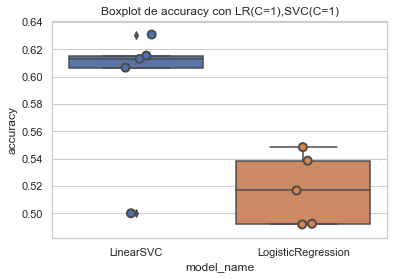

In [146]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.title("Boxplot de accuracy con LR(C=1),SVC(C=1)")
plt.show()

### Logistic Regression C=5
### LinearSVC C=5

In [147]:
models = [
    LinearSVC(C=5),
    LogisticRegression(C=5,random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df

,model_name,fold_idx,accuracy
0,LinearSVC,0,0.600000
1,LinearSVC,1,0.600000
2,LinearSVC,2,0.629032
3,LinearSVC,3,0.590164
4,LinearSVC,4,0.466667
5,LogisticRegression,0,0.646154
6,LogisticRegression,1,0.569231
7,LogisticRegression,2,0.580645
8,LogisticRegression,3,0.573770
9,LogisticRegression,4,0.500000


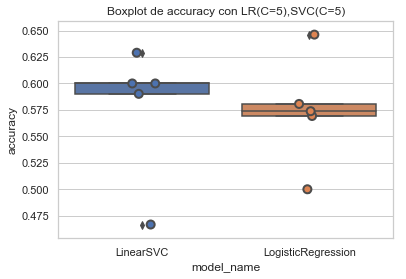

In [148]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.title("Boxplot de accuracy con LR(C=5),SVC(C=5)")
plt.show()

### Logistic Regression C=6
### LinearSVC C=0.5

In [149]:
models = [
    LinearSVC(C=0.5),
    LogisticRegression(C=6,random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df

,model_name,fold_idx,accuracy
0,LinearSVC,0,0.646154
1,LinearSVC,1,0.600000
2,LinearSVC,2,0.580645
3,LinearSVC,3,0.606557
4,LinearSVC,4,0.516667
5,LogisticRegression,0,0.646154
6,LogisticRegression,1,0.553846
7,LogisticRegression,2,0.580645
8,LogisticRegression,3,0.573770
9,LogisticRegression,4,0.516667


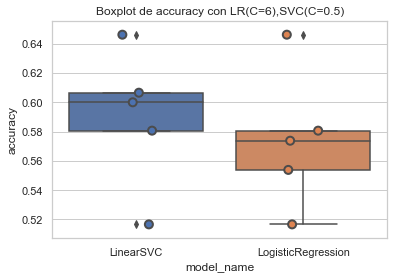

In [150]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.title("Boxplot de accuracy con LR(C=6),SVC(C=0.5)")
plt.show()

### Logistic Regression C=5.1
### LinearSVC C=0.9

In [151]:
models = [
    LinearSVC(C=0.9),
    LogisticRegression(C=5.1,random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df

,model_name,fold_idx,accuracy
0,LinearSVC,0,0.630769
1,LinearSVC,1,0.615385
2,LinearSVC,2,0.580645
3,LinearSVC,3,0.606557
4,LinearSVC,4,0.500000
5,LogisticRegression,0,0.646154
6,LogisticRegression,1,0.569231
7,LogisticRegression,2,0.580645
8,LogisticRegression,3,0.573770
9,LogisticRegression,4,0.516667


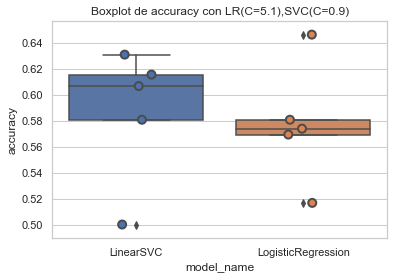

In [152]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.title("Boxplot de accuracy con LR(C=5.1),SVC(C=0.9)")
plt.show()

### Logistic Regression C=5.2
### LinearSVC C=1.1

In [157]:
models = [
    LinearSVC(C=1.1),
    LogisticRegression(C=5.2,random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df

,model_name,fold_idx,accuracy
0,LinearSVC,0,0.630769
1,LinearSVC,1,0.615385
2,LinearSVC,2,0.596774
3,LinearSVC,3,0.606557
4,LinearSVC,4,0.500000
5,LogisticRegression,0,0.646154
6,LogisticRegression,1,0.569231
7,LogisticRegression,2,0.580645
8,LogisticRegression,3,0.573770
9,LogisticRegression,4,0.516667


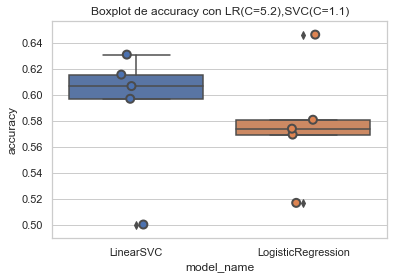

In [158]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.title("Boxplot de accuracy con LR(C=5.2),SVC(C=1.1)")
plt.show()

### Logistic Regression C=5.15
### LinearSVC C=1.2

In [155]:
models = [
    LinearSVC(C=1.2),
    LogisticRegression(C=5.15,random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df

,model_name,fold_idx,accuracy
0,LinearSVC,0,0.630769
1,LinearSVC,1,0.600000
2,LinearSVC,2,0.596774
3,LinearSVC,3,0.606557
4,LinearSVC,4,0.500000
5,LogisticRegression,0,0.646154
6,LogisticRegression,1,0.569231
7,LogisticRegression,2,0.580645
8,LogisticRegression,3,0.573770
9,LogisticRegression,4,0.516667


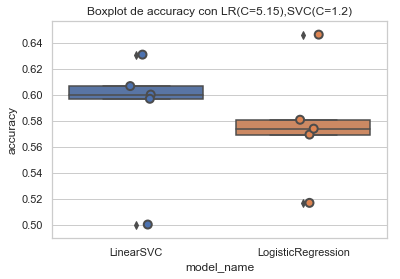

In [156]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.title("Boxplot de accuracy con LR(C=5.15),SVC(C=1.2)")
plt.show()

## Evaluación del modelo Linear SVC

--------Matriz de confusión para el modelo Linear SVC de predicción de categoria--------


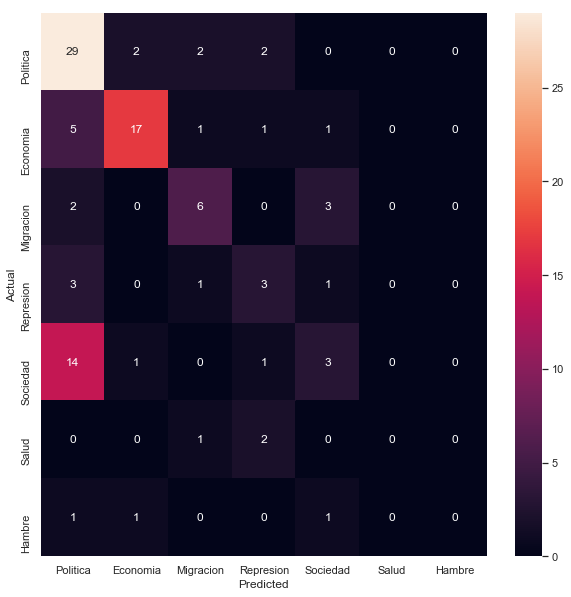

In [167]:
model = LinearSVC(C=1.1)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, noti.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("--------Matriz de confusión para el modelo Linear SVC de predicción de categoria--------")
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.categoria.values, yticklabels=category_id_df.categoria.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [168]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=noti['categoria'].unique()))

              precision    recall  f1-score   support

    Economia       0.54      0.83      0.65        35
    Politica       0.81      0.68      0.74        25
   Represion       0.55      0.55      0.55        11
       Salud       0.33      0.38      0.35         8
    Sociedad       0.33      0.16      0.21        19
   Migracion       0.00      0.00      0.00         3
      Hambre       0.00      0.00      0.00         3

   micro avg       0.56      0.56      0.56       104
   macro avg       0.37      0.37      0.36       104
weighted avg       0.52      0.56      0.52       104



C:\Users\User\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Evaluación del modelo Linear SVC

--------Matriz de confusión para el modelo Linear Logistic Regression de predicción de categoria--------


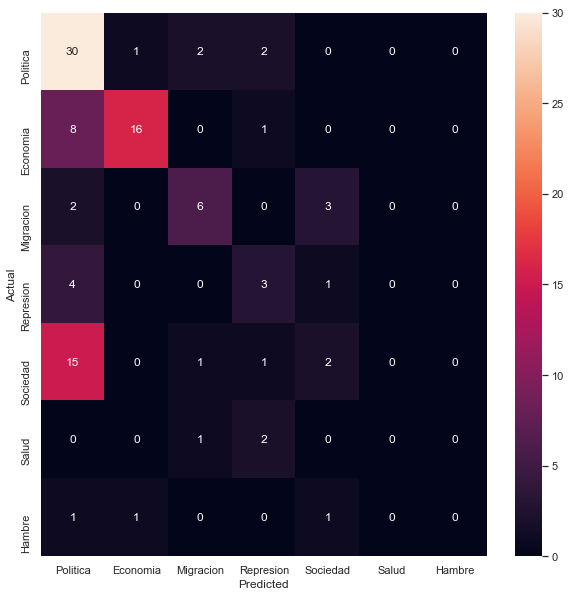

In [169]:
model = LogisticRegression(C=5.15,random_state=0)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, noti.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("--------Matriz de confusión para el modelo Linear Logistic Regression de predicción de categoria--------")
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.categoria.values, yticklabels=category_id_df.categoria.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [170]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=noti['categoria'].unique()))

              precision    recall  f1-score   support

    Economia       0.50      0.86      0.63        35
    Politica       0.89      0.64      0.74        25
   Represion       0.60      0.55      0.57        11
       Salud       0.33      0.38      0.35         8
    Sociedad       0.29      0.11      0.15        19
   Migracion       0.00      0.00      0.00         3
      Hambre       0.00      0.00      0.00         3

   micro avg       0.55      0.55      0.55       104
   macro avg       0.37      0.36      0.35       104
weighted avg       0.52      0.55      0.51       104



C:\Users\User\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
